In [1]:
%matplotlib notebook

In [2]:
#import dependencies

import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress
from sklearn import datasets

In [3]:
#Read csv

covid_data_csv = 'Resources/us_states_covid19_daily.csv'
covid_data = pd.read_csv(covid_data_csv)
covid_data.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [4]:
#Reverse the data set

covid_data_reversed = covid_data.reindex(index=covid_data.index[::-1])
#covid_data_reversed

In [5]:
data_count = covid_data_reversed.count()
#data_count

In [6]:
#Exclude irrelevant/extra information

covid_data_reduced = covid_data_reversed[['date', 
                                          'state', 
                                          'positive', 
                                          'hospitalizedCurrently', 
                                          'onVentilatorCurrently', 
                                          'inIcuCurrently', 
                                          'death', 
                                         'deathIncrease']]
covid_data_reduced.head()

,date,state,positive,hospitalizedCurrently,onVentilatorCurrently,inIcuCurrently,death,deathIncrease
15632,20200122,WA,0.0,NaN,NaN,NaN,NaN,0
15631,20200122,MA,NaN,NaN,NaN,NaN,NaN,0
15630,20200123,WA,0.0,NaN,NaN,NaN,NaN,0
15629,20200123,MA,NaN,NaN,NaN,NaN,NaN,0
15628,20200124,WA,0.0,NaN,NaN,NaN,NaN,0


In [7]:
#Edit headers

clean_covid_data_df = covid_data_reduced.rename(columns={'date':'Date', 
                                                  'state':'State', 
                                                  'positive':'Positive', 
                                                  'hospitalizedCurrently':'Currently Hospitalized', 
                                                  'onVentilatorCurrently':'Currently On Ventilator',
                                                  'inIcuCurrently':'Currently In ICU', 
                                                  'death':'Deaths', 
                                                        'deathIncrease':'Daily Deaths'})
clean_covid_data_df.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
15632,20200122,WA,0.0,NaN,NaN,NaN,NaN,0
15631,20200122,MA,NaN,NaN,NaN,NaN,NaN,0
15630,20200123,WA,0.0,NaN,NaN,NaN,NaN,0
15629,20200123,MA,NaN,NaN,NaN,NaN,NaN,0
15628,20200124,WA,0.0,NaN,NaN,NaN,NaN,0


In [8]:
clean_covid_data_df.count()

Date                       15633
State                      15633
Positive                   15481
Currently Hospitalized     12516
Currently On Ventilator     6211
Currently In ICU            7713
Deaths                     14807
Daily Deaths               15633
dtype: int64

In [9]:
#Fix the NA values

covid_data_df = clean_covid_data_df.replace(np.nan,0)
covid_data_df.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
15632,20200122,WA,0.0,0.0,0.0,0.0,0.0,0
15631,20200122,MA,0.0,0.0,0.0,0.0,0.0,0
15630,20200123,WA,0.0,0.0,0.0,0.0,0.0,0
15629,20200123,MA,0.0,0.0,0.0,0.0,0.0,0
15628,20200124,WA,0.0,0.0,0.0,0.0,0.0,0


March 15 Covid Data  

In [10]:
#Single out data from March 15, 2020

march15_data = covid_data_df.loc[covid_data_df['Date'] == 20200315].sort_values('Positive', ascending=False)
march15_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
14918,20200315,MI,2188.0,0.0,0.0,0.0,0.0,0
14943,20200315,WA,1282.0,0.0,0.0,0.0,57.0,6
14930,20200315,NY,648.0,0.0,0.0,0.0,3.0,3
14900,20200315,CA,293.0,0.0,0.0,0.0,5.0,0
14901,20200315,CO,131.0,0.0,0.0,0.0,1.0,0


<IPython.core.display.Javascript object>


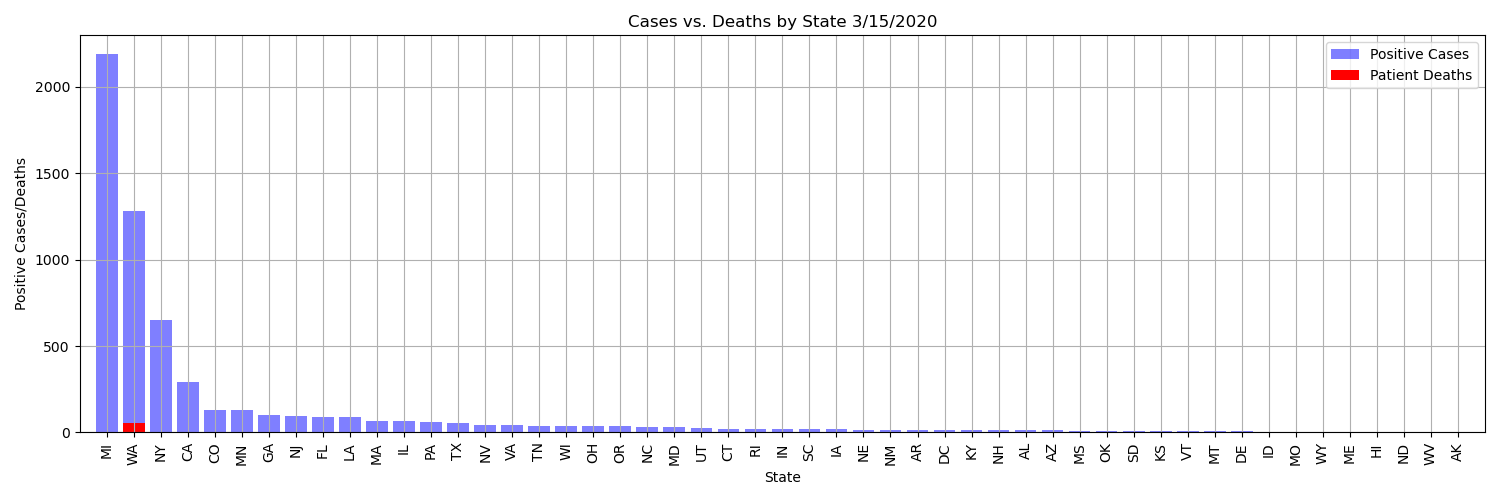

In [69]:
#Plot into bar graph

x_axis = np.arange(len(march15_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, march15_data['Positive'], color='blue', alpha=0.5, align='center', label='Positive Cases')
plt.bar(x_axis, march15_data['Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, march15_data['State'], rotation='vertical')
plt.title('Cases vs. Deaths by State 3/15/2020')
plt.xlabel('State')
plt.ylabel('Positive Cases/Deaths')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save the image

plt.tight_layout()
plt.savefig('Images/march15_state_cases.png')
plt.show()

In [13]:
#Readjust data set for deaths

march15_death_data = covid_data_df.loc[covid_data_df['Date'] == 20200315].sort_values('Deaths', ascending=False)
march15_death_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
14943,20200315,WA,1282.0,0.0,0.0,0.0,57.0,6
14900,20200315,CA,293.0,0.0,0.0,0.0,5.0,0
14905,20200315,FL,91.0,0.0,0.0,0.0,4.0,1
14930,20200315,NY,648.0,0.0,0.0,0.0,3.0,3
14927,20200315,NJ,98.0,0.0,0.0,0.0,2.0,1


<IPython.core.display.Javascript object>


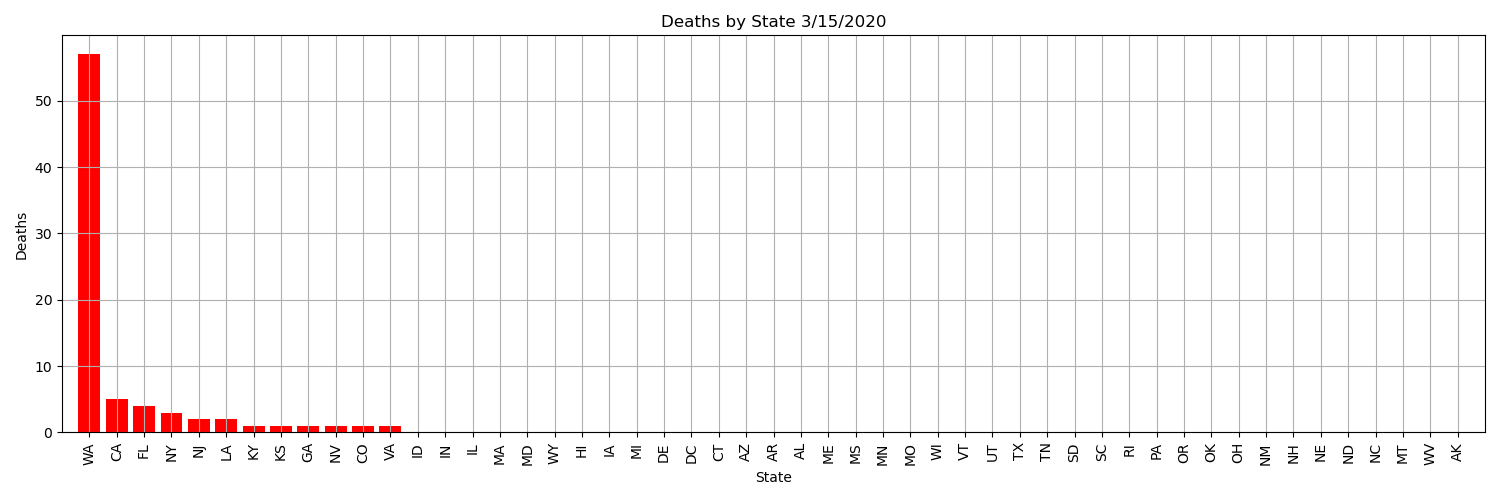

In [14]:
x_axis = np.arange(len(march15_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, march15_death_data['Deaths'], color='red', alpha=1, align='center')
plt.xticks(x_axis, march15_death_data['State'], rotation='vertical')
plt.title('Deaths by State 3/15/2020')
plt.xlabel('State')
plt.ylabel('Deaths')
plt.xlim(-1,len(x_axis))
plt.grid()

#Save the image

plt.tight_layout()
plt.savefig('Images/march15_state_deaths.png')
plt.show()

April Data

In [15]:
#Readjust data set for April 1, 2020

april01_data = covid_data_df.loc[covid_data_df['Date'] == 20200401].sort_values('Positive', ascending=False)
april01_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
13981,20200401,NY,83712.0,12226.0,0.0,3022.0,1941.0,391
13978,20200401,NJ,22255.0,2000.0,0.0,0.0,475.0,111
13968,20200401,MI,20246.0,0.0,0.0,0.0,676.0,125
13949,20200401,CA,8155.0,1855.0,0.0,774.0,171.0,18
13965,20200401,MA,7639.0,0.0,0.0,0.0,187.0,34


<IPython.core.display.Javascript object>


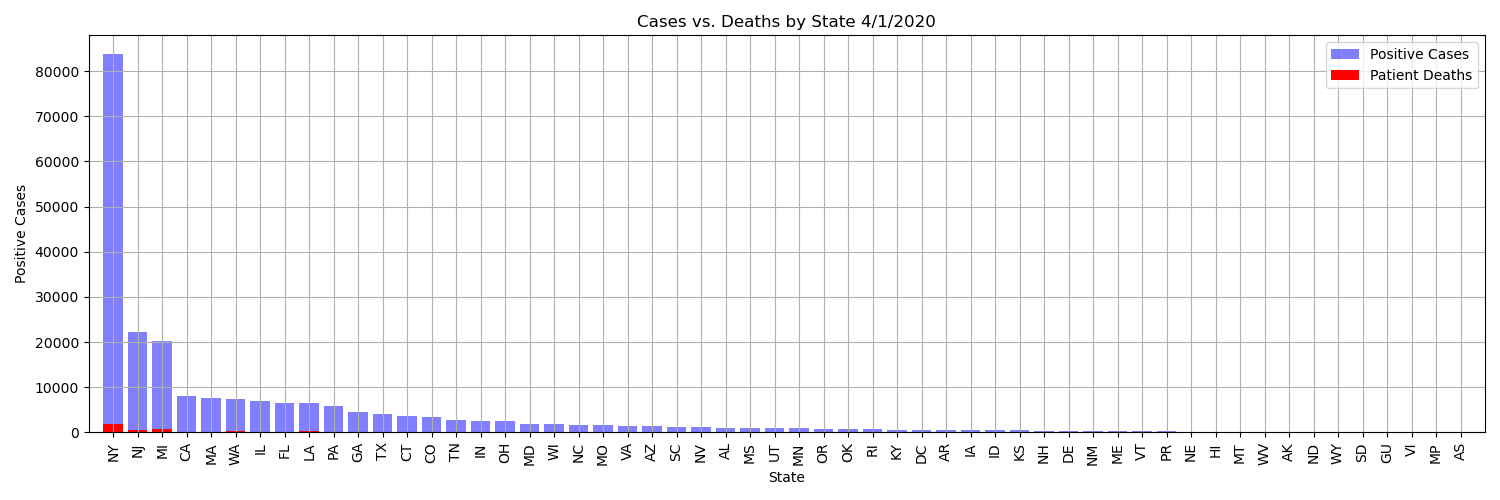

In [16]:
x_axis = np.arange(len(april01_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, april01_data['Positive'], color='blue', alpha=0.5, align='center', label='Positive Cases')
plt.bar(x_axis, april01_data['Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, april01_data['State'], rotation='vertical')
plt.title('Cases vs. Deaths by State 4/1/2020')
plt.xlabel('State')
plt.ylabel('Positive Cases')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

# Save image

plt.tight_layout()
plt.savefig('Images/april01_state_cases.png')
plt.show()

In [17]:
#Readjust data set for deaths

april01_death_data = covid_data_df.loc[covid_data_df['Date'] == 20200401].sort_values('Deaths', ascending=False)
april01_death_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
13981,20200401,NY,83712.0,12226.0,0.0,3022.0,1941.0,391
13968,20200401,MI,20246.0,0.0,0.0,0.0,676.0,125
13978,20200401,NJ,22255.0,2000.0,0.0,0.0,475.0,111
13996,20200401,WA,7399.0,0.0,0.0,0.0,282.0,20
13964,20200401,LA,6424.0,1498.0,490.0,0.0,273.0,34


<IPython.core.display.Javascript object>


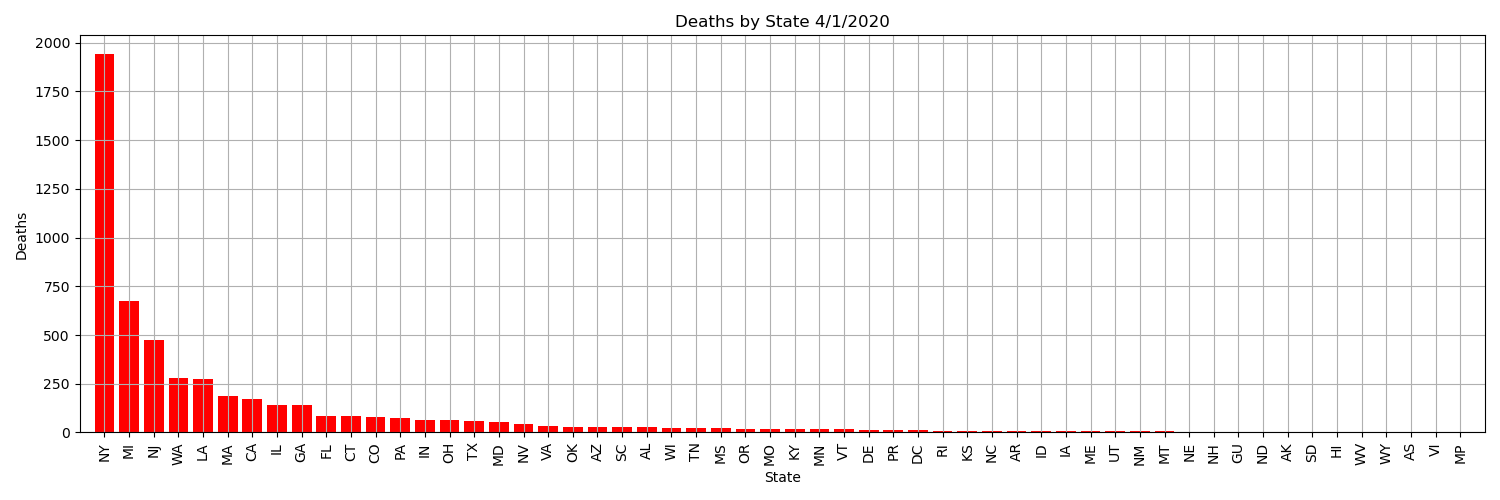

In [18]:
#Plot the bar chart

x_axis = np.arange(len(april01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, april01_death_data['Deaths'], color='red', alpha=1, align='center')
plt.xticks(x_axis, april01_death_data['State'], rotation='vertical')
plt.title('Deaths by State 4/1/2020')
plt.xlabel('State')
plt.ylabel('Deaths')
plt.xlim(-1,len(x_axis))
plt.grid()

#Save the image

plt.tight_layout()
plt.savefig('Images/april01_state_deaths.png')
plt.show()

<IPython.core.display.Javascript object>


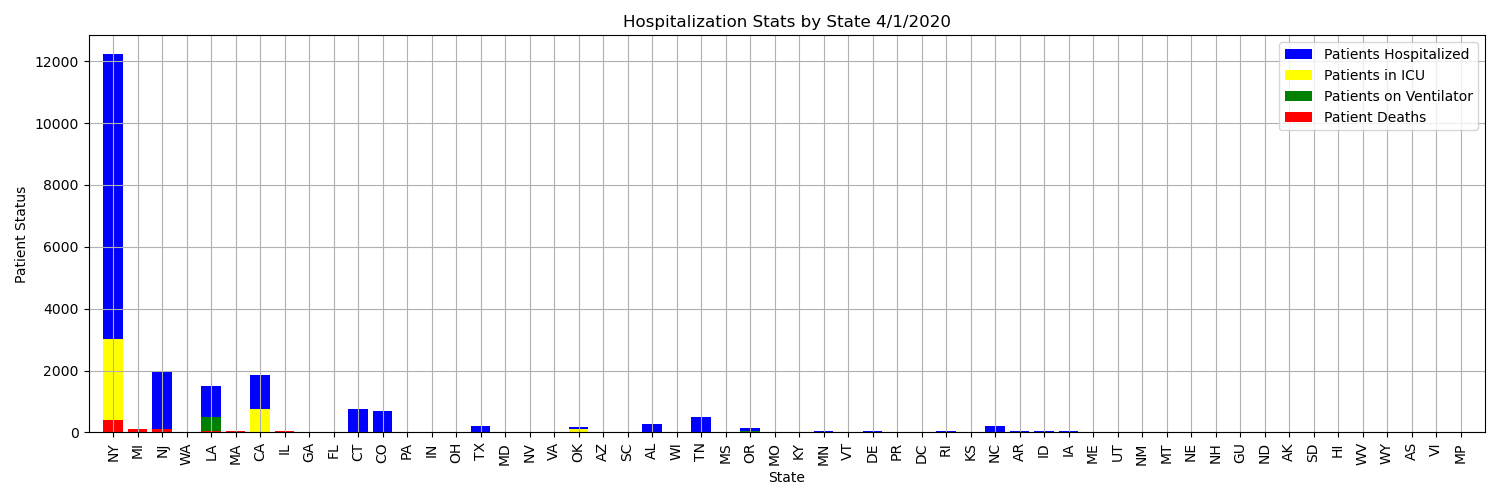

In [20]:
#Plot the bar graph

x_axis = np.arange(len(april01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, april01_death_data['Currently Hospitalized'], color='blue', alpha=1, align='center', label='Patients Hospitalized')
plt.bar(x_axis, april01_death_data['Currently In ICU'], color='yellow', alpha=1, align='center', label='Patients in ICU')
plt.bar(x_axis, april01_death_data['Currently On Ventilator'], color='green', alpha=1, align='center', label='Patients on Ventilator')
plt.bar(x_axis, april01_death_data['Daily Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, april01_death_data['State'], rotation='vertical')
plt.title('Hospitalization Stats by State 4/1/2020')
plt.xlabel('State')
plt.ylabel('Patient Status')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save the image

plt.tight_layout()
plt.savefig('Images/april01_status_comparison.png')
plt.show()

<IPython.core.display.Javascript object>


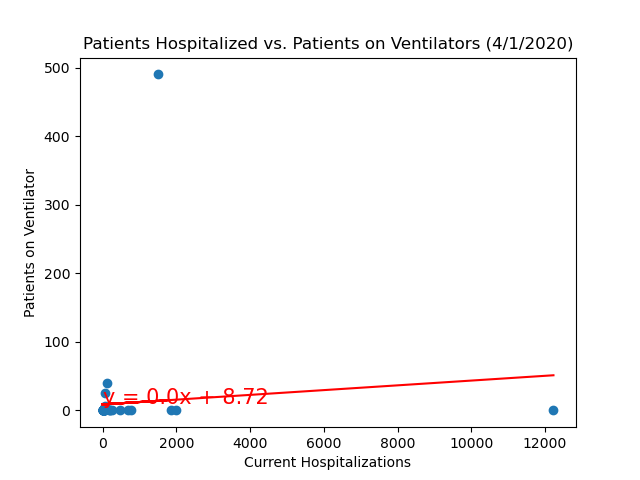

The r-squared is: 0.007808853959886937


In [21]:
#Plot Scatterplot comparing Hospitalizations and Ventilator Usage and calculate linear regression

x_values = april01_data['Currently Hospitalized']
y_values = april01_data['Currently On Ventilator']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Patients Hospitalized vs. Patients on Ventilators (4/1/2020)')
plt.xlabel('Current Hospitalizations')
plt.ylabel('Patients on Ventilator')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/april01_hosp_vs_vent.png')
plt.show()

June Data

In [22]:
#Readjust data set for June 1, 2020

june01_data = covid_data_df.loc[covid_data_df['Date'] == 20200601].sort_values('Positive', ascending=False)
june01_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
10565,20200601,NY,371711.0,3331.0,746.0,999.0,23959.0,54
10562,20200601,NJ,160918.0,2466.0,459.0,646.0,13438.0,26
10544,20200601,IL,121234.0,3215.0,547.0,902.0,5412.0,22
10533,20200601,CA,113006.0,4258.0,0.0,1273.0,4251.0,38
10549,20200601,MA,100805.0,1747.0,289.0,404.0,7035.0,189


<IPython.core.display.Javascript object>


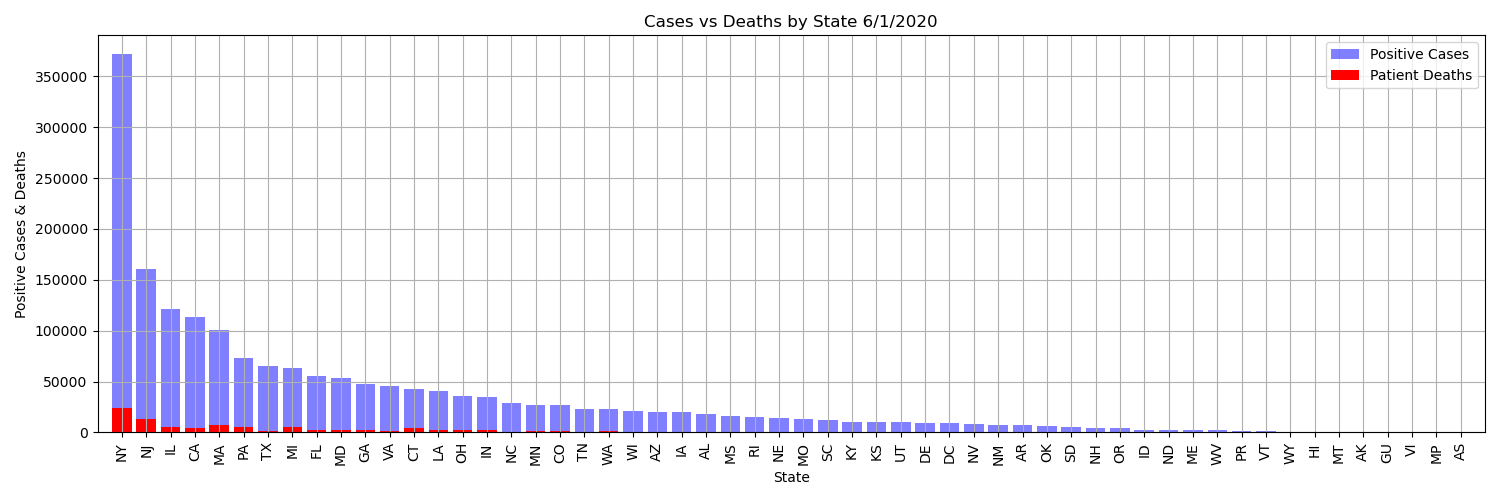

In [23]:
#Plot the bar graph

x_axis = np.arange(len(june01_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, june01_data['Positive'], color='blue', alpha=0.5, align='center', label='Positive Cases')
plt.bar(x_axis, june01_data['Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, june01_data['State'], rotation='vertical')
plt.title('Cases vs Deaths by State 6/1/2020')
plt.xlabel('State')
plt.ylabel('Positive Cases & Deaths')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save the image

plt.tight_layout()
plt.savefig('Images/june01_state_cases.png')
plt.show()

In [24]:
#Readjust for June deaths

june01_death_data = covid_data_df.loc[covid_data_df['Date'] == 20200601].sort_values('Deaths', ascending=False)
june01_death_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
10565,20200601,NY,371711.0,3331.0,746.0,999.0,23959.0,54
10562,20200601,NJ,160918.0,2466.0,459.0,646.0,13438.0,26
10549,20200601,MA,100805.0,1747.0,289.0,404.0,7035.0,189
10552,20200601,MI,63813.0,674.0,240.0,346.0,5843.0,25
10569,20200601,PA,72898.0,1302.0,287.0,0.0,5567.0,12


<IPython.core.display.Javascript object>


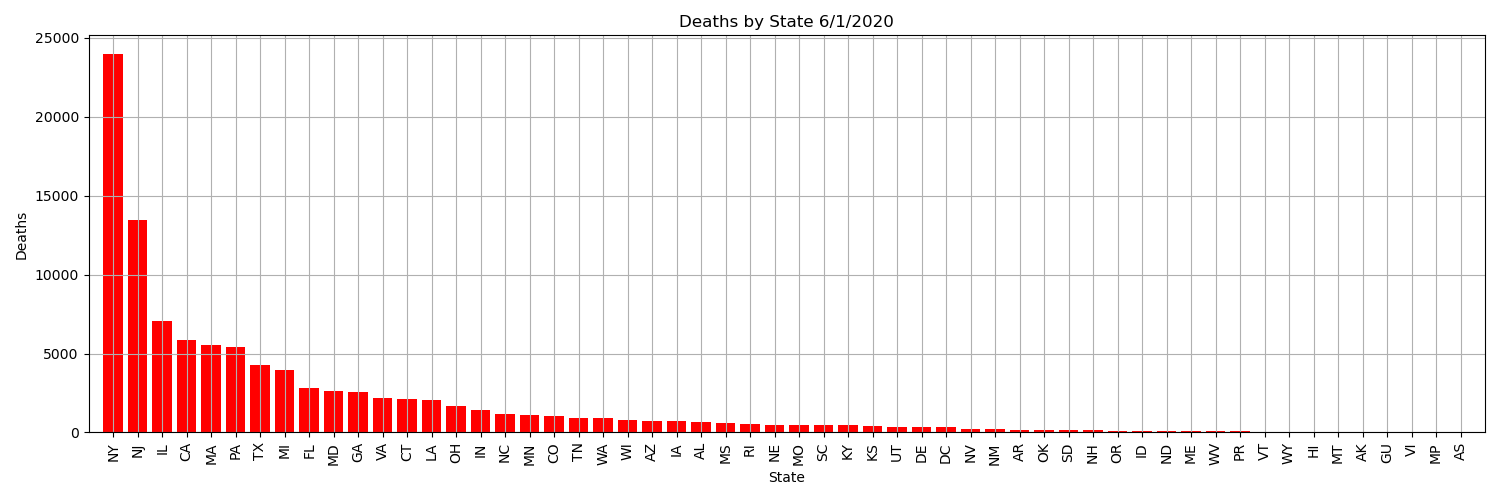

In [25]:
#Plot bar graph

x_axis = np.arange(len(june01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, june01_death_data['Deaths'], color='red', alpha=1, align='center')
plt.xticks(x_axis, june01_data['State'], rotation='vertical')
plt.title('Deaths by State 6/1/2020')
plt.xlabel('State')
plt.ylabel('Deaths')
plt.xlim(-1,len(x_axis))
plt.grid()

#Save the image

plt.tight_layout()
plt.savefig('Images/june01_state_deaths.png')
plt.show()

<IPython.core.display.Javascript object>


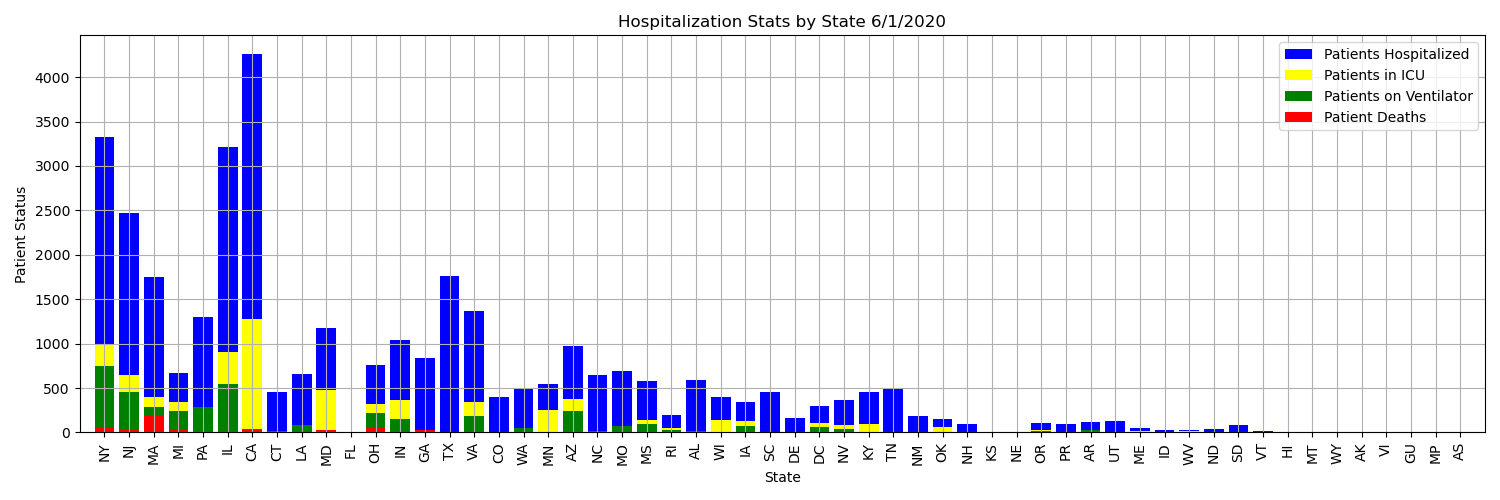

In [46]:
#Plot the bar graph

x_axis = np.arange(len(june01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, june01_death_data['Currently Hospitalized'], color='blue', alpha=1, align='center', label='Patients Hospitalized')
plt.bar(x_axis, june01_death_data['Currently In ICU'], color='yellow', alpha=1, align='center', label='Patients in ICU')
plt.bar(x_axis, june01_death_data['Currently On Ventilator'], color='green', alpha=1, align='center', label='Patients on Ventilator')
plt.bar(x_axis, june01_death_data['Daily Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, june01_death_data['State'], rotation='vertical')
plt.title('Hospitalization Stats by State 6/1/2020')
plt.xlabel('State')
plt.ylabel('Patient Status')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save the image

plt.tight_layout()
plt.savefig('Images/june01_status_comparison.png')
plt.show()

<IPython.core.display.Javascript object>


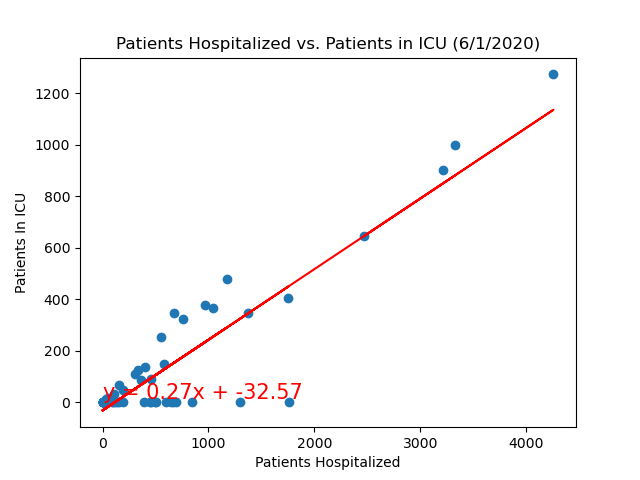

The r-squared is: 0.8260754958872069


In [26]:
#Scatterplot comparison of Hospitalizations and ICU patients

x_values = june01_data['Currently Hospitalized']
y_values = june01_data['Currently In ICU']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients Hospitalized')
plt.ylabel('Patients In ICU')
plt.title('Patients Hospitalized vs. Patients in ICU (6/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/june01_hosp_vs_icu.png')
plt.show()

<IPython.core.display.Javascript object>


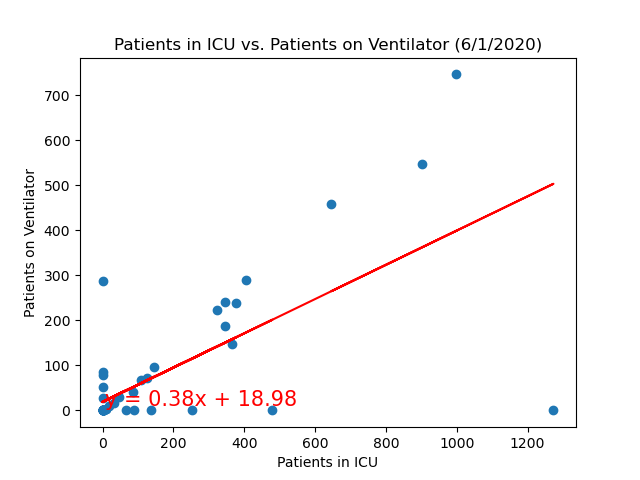

The r-squared is: 0.4752782733501303


In [27]:
#Scatterplot of Patients in ICU vs Patients on Ventilator

x_values = june01_data['Currently In ICU']
y_values = june01_data['Currently On Ventilator']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients in ICU')
plt.ylabel('Patients on Ventilator')
plt.title('Patients in ICU vs. Patients on Ventilator (6/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/june01_icu_vs_vent.png')
plt.show()

<IPython.core.display.Javascript object>


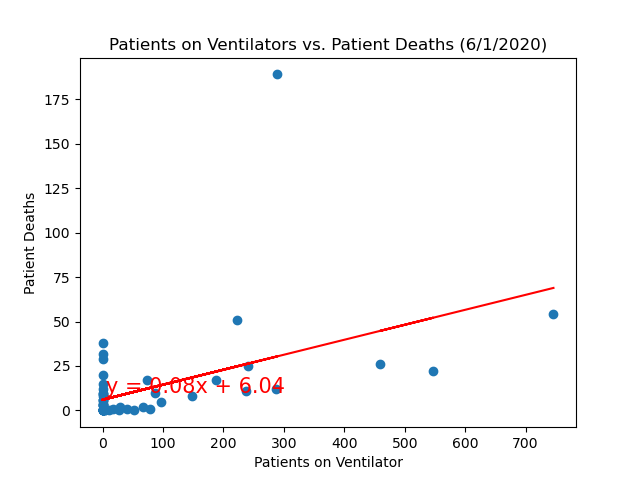

The r-squared is: 0.2122734498896995


In [30]:
#Scatterplot of Patients on Ventilators vs Daily Deaths

x_values = june01_data['Currently On Ventilator']
y_values = june01_data['Daily Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patient Deaths')
plt.title('Patients on Ventilators vs. Patient Deaths (6/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/june01_vent_vs_death.png')
plt.show()

<IPython.core.display.Javascript object>


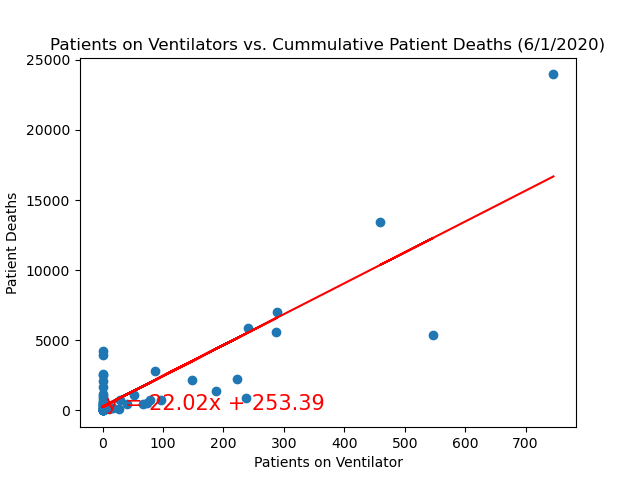

The r-squared is: 0.736933322081767


In [40]:
#Scatterplot of Patients on Ventilators vs Daily Deaths

x_values = june01_data['Currently On Ventilator']
y_values = june01_data['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patient Deaths')
plt.title('Patients on Ventilators vs. Cummulative Patient Deaths (6/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/june01_vent_vs_totaldeath.png')
plt.show()

August Data

In [32]:
#Readjust dataset for August

august01_data = covid_data_df.loc[covid_data_df['Date'] == 20200701].sort_values('Positive', ascending=False)
august01_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
8885,20200701,NY,394079.0,879.0,139.0,226.0,24866.0,11
8853,20200701,CA,236139.0,6612.0,0.0,1859.0,6090.0,110
8882,20200701,NJ,171928.0,1080.0,178.0,217.0,14987.0,43
8895,20200701,TX,168062.0,6904.0,0.0,0.0,2481.0,57
8858,20200701,FL,156434.0,0.0,0.0,0.0,3650.0,46


<IPython.core.display.Javascript object>


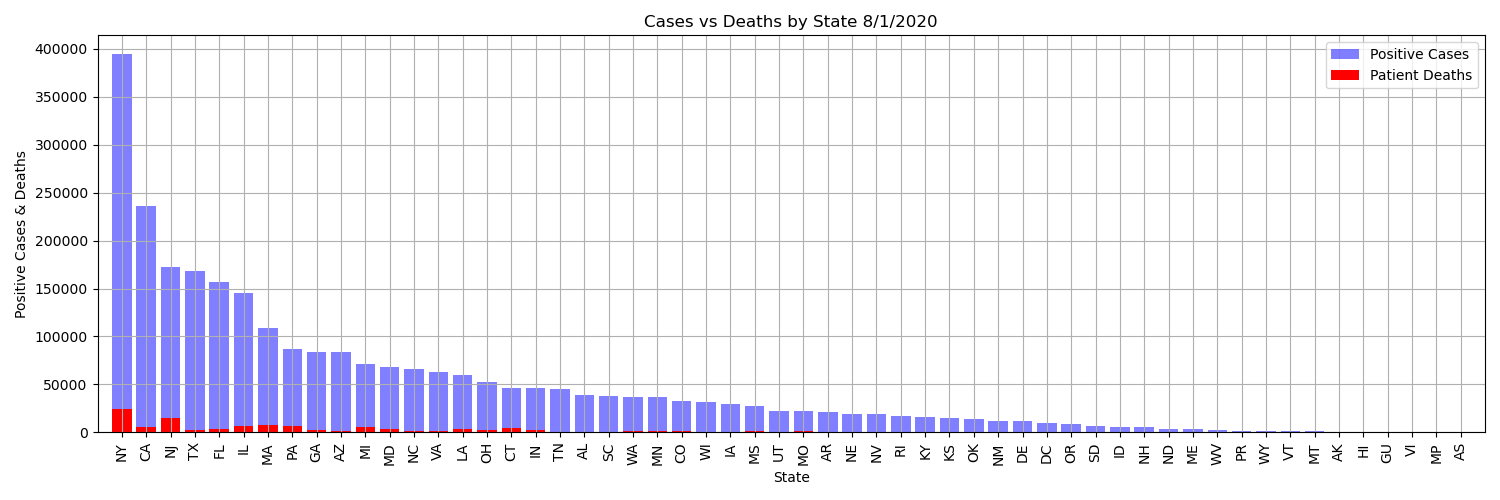

In [33]:
#plot bar graphs

x_axis = np.arange(len(august01_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, august01_data['Positive'], color='blue', alpha=0.5, align='center', label='Positive Cases')
plt.bar(x_axis, august01_data['Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, august01_data['State'], rotation='vertical')
plt.title('Cases vs Deaths by State 8/1/2020')
plt.xlabel('State')
plt.ylabel('Positive Cases & Deaths')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save image

plt.tight_layout()
plt.savefig('Images/august01_state_cases.png')
plt.show()

In [34]:
#Readjust for august deaths

august01_death_data = covid_data_df.loc[covid_data_df['Date'] == 20200701].sort_values('Deaths', ascending=False)
august01_death_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
8885,20200701,NY,394079.0,879.0,139.0,226.0,24866.0,11
8882,20200701,NJ,171928.0,1080.0,178.0,217.0,14987.0,43
8869,20200701,MA,109143.0,760.0,65.0,123.0,8081.0,27
8864,20200701,IL,145066.0,1511.0,189.0,384.0,7152.0,28
8889,20200701,PA,87242.0,632.0,111.0,0.0,6649.0,0


<IPython.core.display.Javascript object>


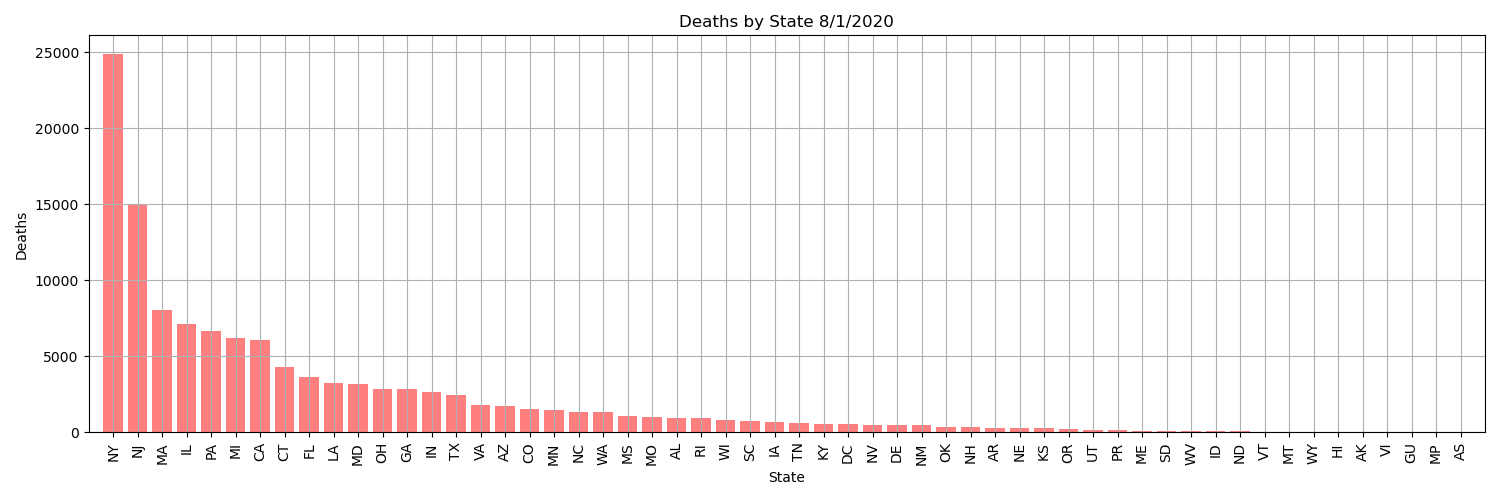

In [35]:
#plot the bar graphs

x_axis = np.arange(len(august01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, august01_death_data['Deaths'], color='red', alpha=0.5, align='center')
plt.xticks(x_axis, august01_death_data['State'], rotation='vertical')
plt.title('Deaths by State 8/1/2020')
plt.xlabel('State')
plt.ylabel('Deaths')
plt.xlim(-1,len(x_axis))
plt.grid()

#Save the image

plt.tight_layout()
plt.savefig('Images/august01_state_deaths.png')
plt.show()

<IPython.core.display.Javascript object>


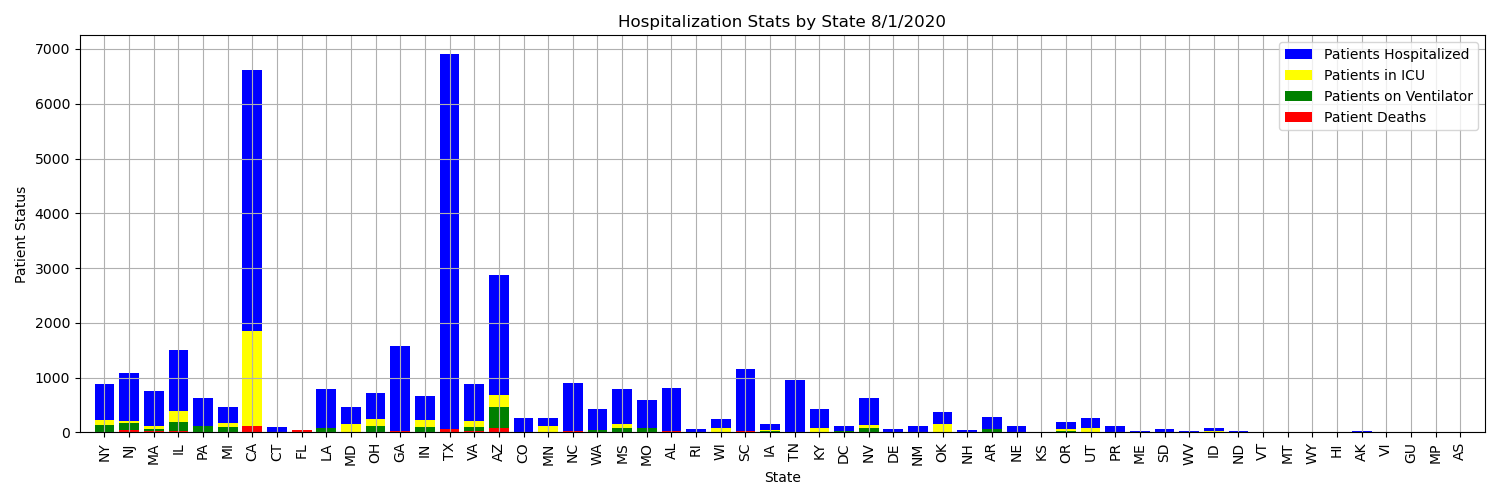

In [47]:
#Plot the bar graph

x_axis = np.arange(len(august01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, august01_death_data['Currently Hospitalized'], color='blue', alpha=1, align='center', label='Patients Hospitalized')
plt.bar(x_axis, august01_death_data['Currently In ICU'], color='yellow', alpha=1, align='center', label='Patients in ICU')
plt.bar(x_axis, august01_death_data['Currently On Ventilator'], color='green', alpha=1, align='center', label='Patients on Ventilator')
plt.bar(x_axis, august01_death_data['Daily Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, august01_death_data['State'], rotation='vertical')
plt.title('Hospitalization Stats by State 8/1/2020')
plt.xlabel('State')
plt.ylabel('Patient Status')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save the image

plt.tight_layout()
plt.savefig('Images/august01_status_comparison.png')
plt.show()

<IPython.core.display.Javascript object>


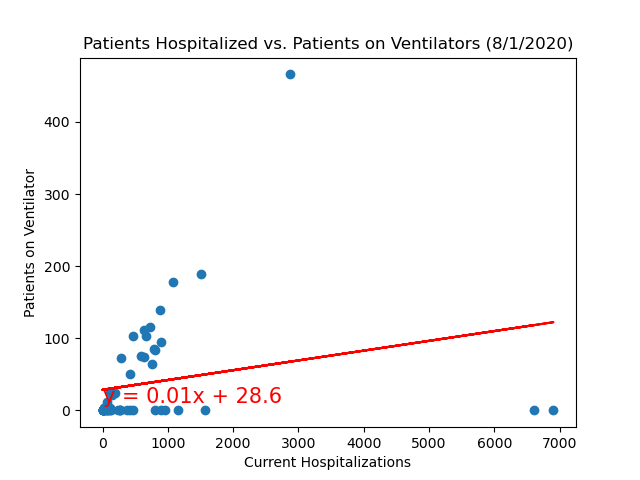

The r-squared is: 0.05313564656047395


In [36]:
#Scatterplots for Hospitalizations vs Ventilators

x_values = august01_data['Currently Hospitalized']
y_values = august01_data['Currently On Ventilator']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Current Hospitalizations')
plt.ylabel('Patients on Ventilator')
plt.title('Patients Hospitalized vs. Patients on Ventilators (8/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/august01_hosp_vs_vent.png')
plt.show()

<IPython.core.display.Javascript object>


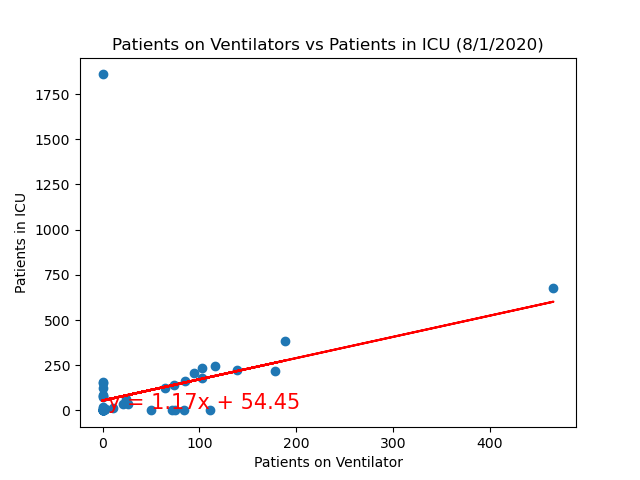

The r-squared is: 0.11172135646353974


In [37]:
#Scatterplots of Patients on ventilators vs. ICU

x_values = august01_data['Currently On Ventilator']
y_values = august01_data['Currently In ICU']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patients in ICU')
plt.title('Patients on Ventilators vs Patients in ICU (8/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/august01_vent_vs_icu.png')
plt.show()

<IPython.core.display.Javascript object>


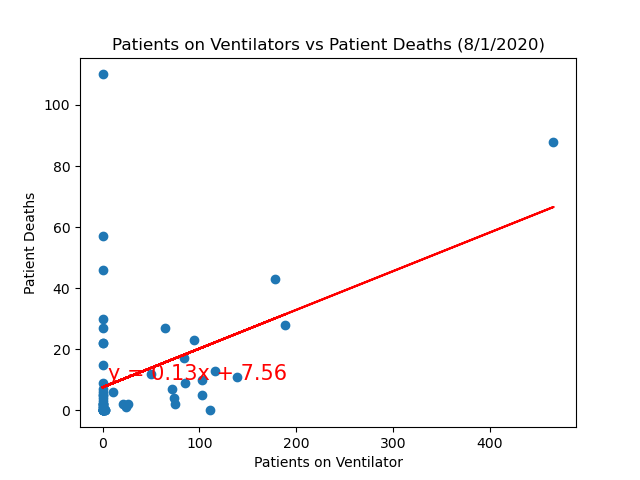

The r-squared is: 0.20775868737216283


In [39]:
#Scatterplots for Ventilators vs Daily Deaths

x_values = august01_data['Currently On Ventilator']
y_values = august01_data['Daily Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patient Deaths')
plt.title('Patients on Ventilators vs Patient Deaths (8/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/august01_vent_vs_death.png')
plt.show()

<IPython.core.display.Javascript object>


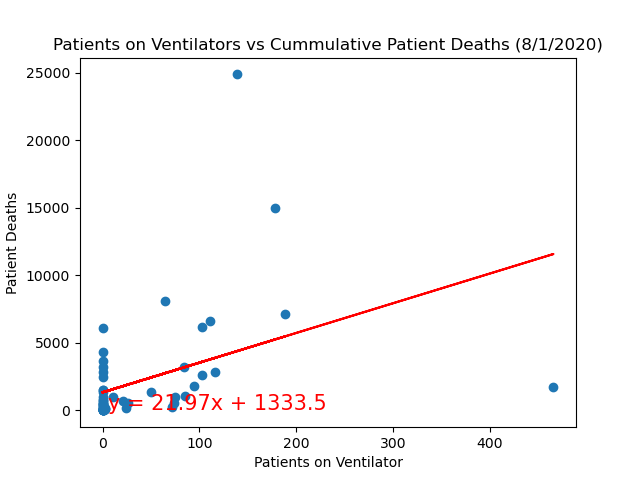

The r-squared is: 0.16755445234753888


In [41]:
#Scatterplots for Ventilators vs Deaths

x_values = august01_data['Currently On Ventilator']
y_values = august01_data['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patient Deaths')
plt.title('Patients on Ventilators vs Cummulative Patient Deaths (8/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/august01_vent_vs_totaldeath.png')
plt.show()

October Data

In [42]:
#Readjust data set for October 1, 2020

october01_data = covid_data_df.loc[covid_data_df['Date'] == 20201001].sort_values('Positive', ascending=False)
october01_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
3701,20201001,CA,813687.0,3205.0,0.0,817.0,15888.0,96
3743,20201001,TX,752501.0,3190.0,0.0,1075.0,15823.0,112
3706,20201001,FL,700602.0,2080.0,0.0,0.0,14619.0,131
3733,20201001,NY,460031.0,612.0,63.0,141.0,25490.0,11
3707,20201001,GA,319334.0,1858.0,0.0,0.0,7063.0,42


<IPython.core.display.Javascript object>


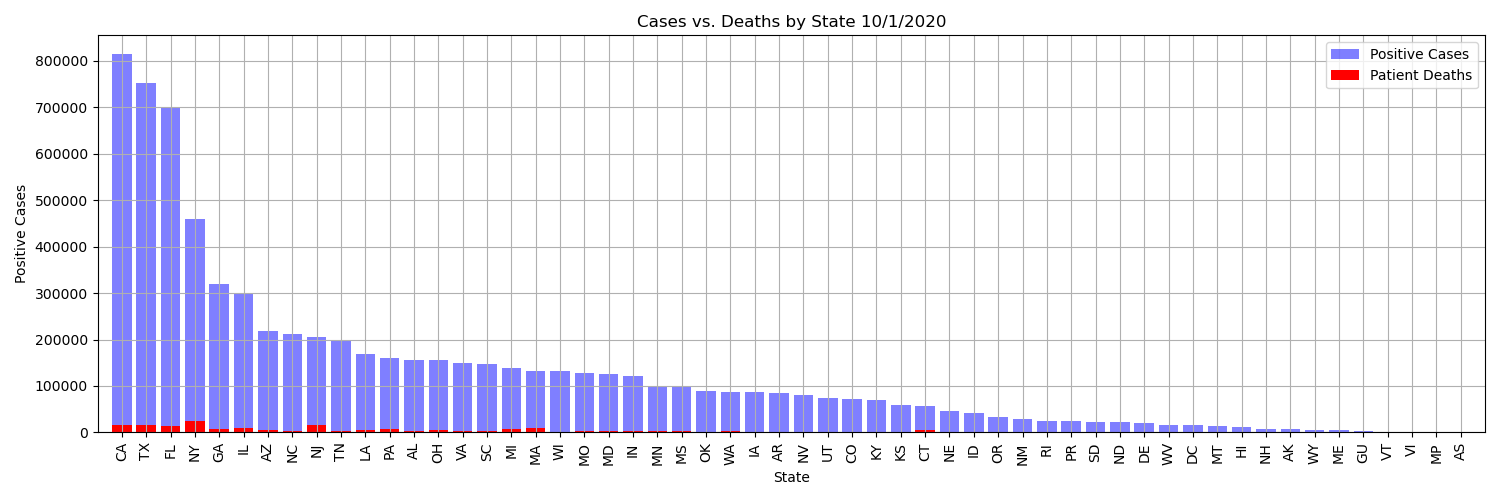

In [43]:
#plot bar graphs for October

x_axis = np.arange(len(october01_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, october01_data['Positive'], color='blue', alpha=0.5, align='center', label='Positive Cases')
plt.bar(x_axis, october01_data['Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, october01_data['State'], rotation='vertical')
plt.title('Cases vs. Deaths by State 10/1/2020')
plt.xlabel('State')
plt.ylabel('Positive Cases')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save the image

plt.tight_layout()
plt.savefig('Images/october01_state_cases.png')
plt.show()

In [48]:
#REadjust for October Deaths

october01_death_data = covid_data_df.loc[covid_data_df['Date'] == 20201001].sort_values('Deaths', ascending=False)
october01_death_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
3733,20201001,NY,460031.0,612.0,63.0,141.0,25490.0,11
3730,20201001,NJ,205889.0,523.0,39.0,96.0,16127.0,5
3701,20201001,CA,813687.0,3205.0,0.0,817.0,15888.0,96
3743,20201001,TX,752501.0,3190.0,0.0,1075.0,15823.0,112
3706,20201001,FL,700602.0,2080.0,0.0,0.0,14619.0,131


<IPython.core.display.Javascript object>


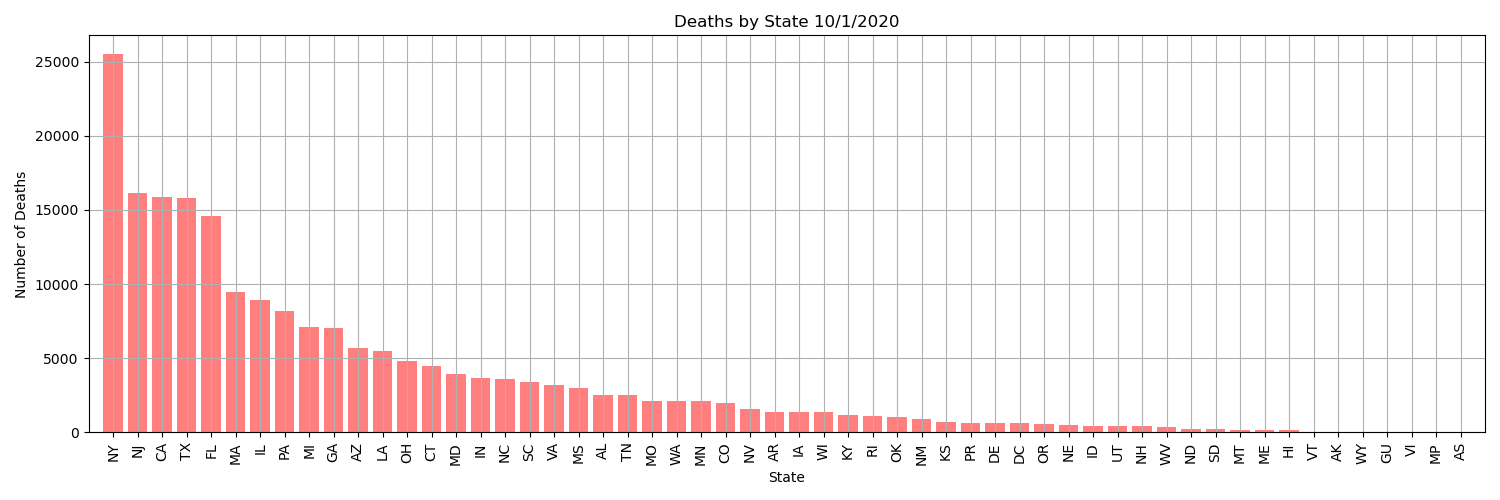

In [49]:
#Plot bar graphs for deaths 

x_axis = np.arange(len(october01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, october01_death_data['Deaths'], color='red', alpha=0.5, align='center')
plt.xticks(x_axis, october01_death_data['State'], rotation='vertical')
plt.title('Deaths by State 10/1/2020')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xlim(-1,len(x_axis))
plt.grid()

#Save the image

plt.tight_layout()
plt.savefig('Images/october01_state_deaths.png')
plt.show()

<IPython.core.display.Javascript object>


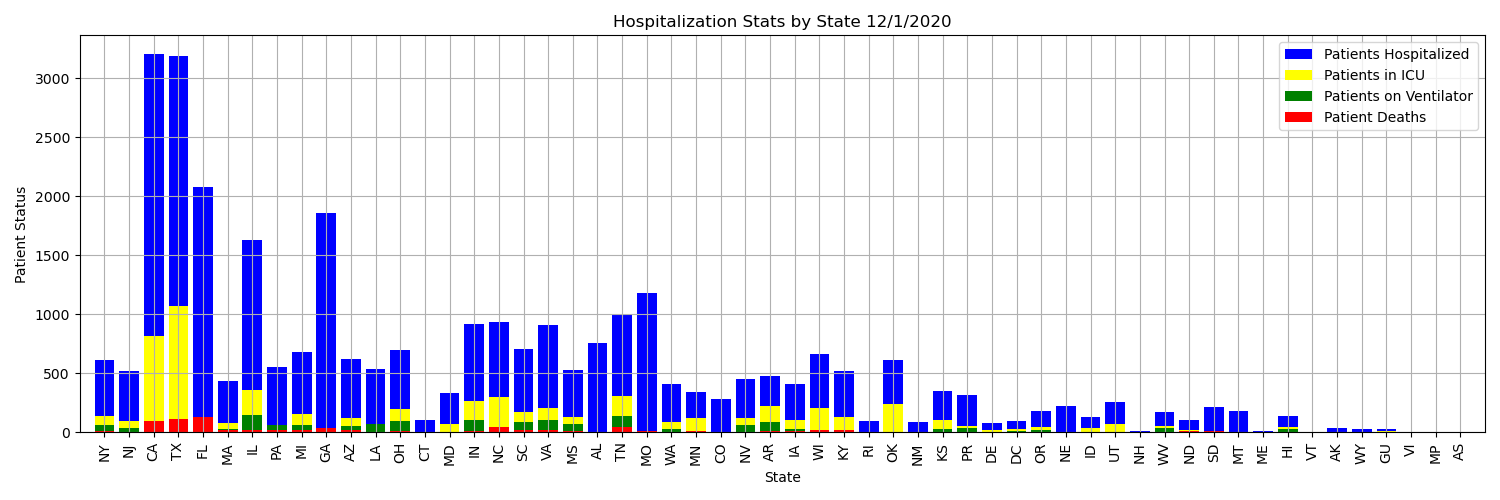

In [50]:
#Plot the bar graph

x_axis = np.arange(len(october01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, october01_death_data['Currently Hospitalized'], color='blue', alpha=1, align='center', label='Patients Hospitalized')
plt.bar(x_axis, october01_death_data['Currently In ICU'], color='yellow', alpha=1, align='center', label='Patients in ICU')
plt.bar(x_axis, october01_death_data['Currently On Ventilator'], color='green', alpha=1, align='center', label='Patients on Ventilator')
plt.bar(x_axis, october01_death_data['Daily Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, october01_death_data['State'], rotation='vertical')
plt.title('Hospitalization Stats by State 12/1/2020')
plt.xlabel('State')
plt.ylabel('Patient Status')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save the image

plt.tight_layout()
plt.savefig('Images/october01_status_comparison.png')
plt.show()

<IPython.core.display.Javascript object>


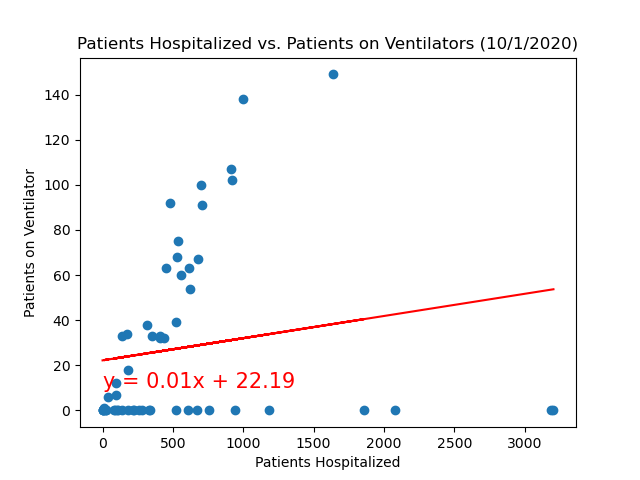

The r-squared is: 0.0287422778318515


In [51]:
#Scatterplot for Hospitalizations and Ventilators

x_values = october01_data['Currently Hospitalized']
y_values = october01_data['Currently On Ventilator']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients Hospitalized')
plt.ylabel('Patients on Ventilator')
plt.title('Patients Hospitalized vs. Patients on Ventilators (10/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/october01_hosp_vs_vent.png')
plt.show()

<IPython.core.display.Javascript object>


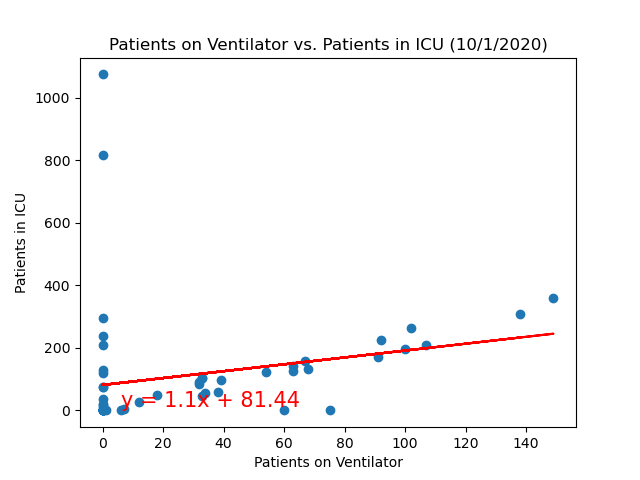

The r-squared is: 0.053157199319662514


In [52]:
#Scatterplot for Ventilator vs ICU

x_values = october01_data['Currently On Ventilator']
y_values = october01_data['Currently In ICU']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patients in ICU')
plt.title('Patients on Ventilator vs. Patients in ICU (10/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/october01_vent_vs_icu.png')
plt.show()

<IPython.core.display.Javascript object>


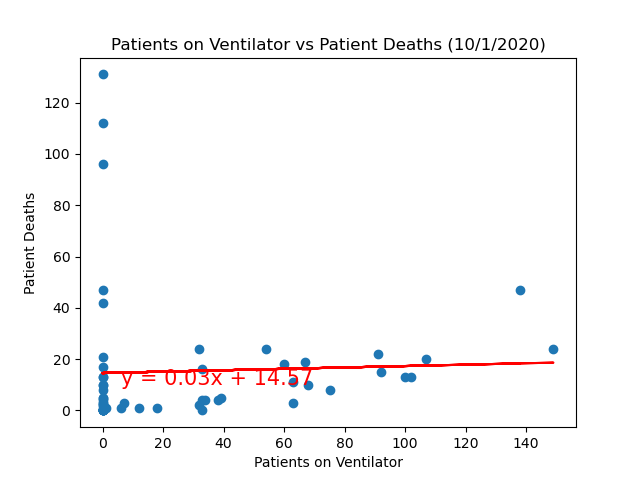

The r-squared is: 0.001691963086736187


In [53]:
#Scatterplots for Ventilators vs Patient Deaths

x_values = october01_data['Currently On Ventilator']
y_values = october01_data['Daily Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patient Deaths')
plt.title('Patients on Ventilator vs Patient Deaths (10/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/october01_vent_vs_death.png')
plt.show()

<IPython.core.display.Javascript object>


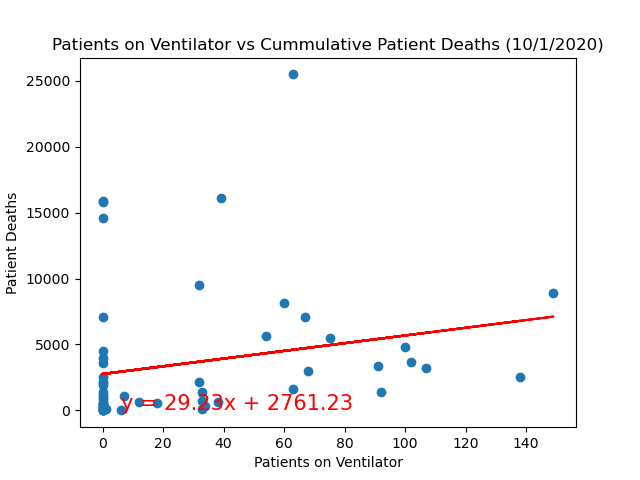

The r-squared is: 0.05000688600579309


In [56]:
#Scatterplots for Ventilators vs Patient Deaths

x_values = october01_data['Currently On Ventilator']
y_values = october01_data['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patient Deaths')
plt.title('Patients on Ventilator vs Cummulative Patient Deaths (10/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/october01_vent_vs_totaldeath.png')
plt.show()

<IPython.core.display.Javascript object>


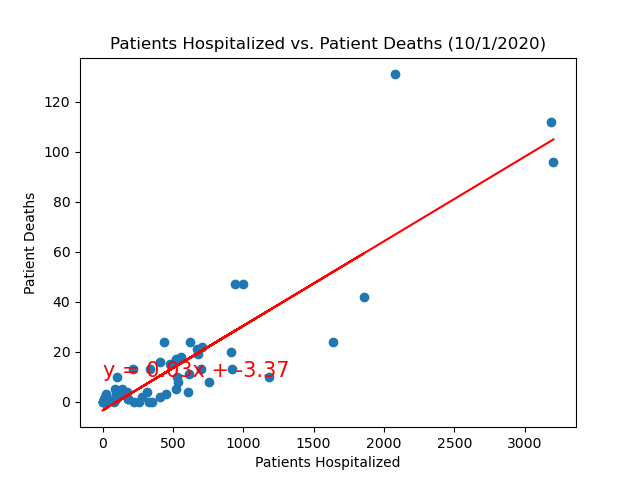

The r-squared is: 0.7734958012470018


In [54]:
#Scatterplot for Hospitalizations vs Deaths

x_values = october01_data['Currently Hospitalized']
y_values = october01_data['Daily Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients Hospitalized')
plt.ylabel('Patient Deaths')
plt.title('Patients Hospitalized vs. Patient Deaths (10/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/october01_hops_vs_deaths.png')
plt.show()

<IPython.core.display.Javascript object>


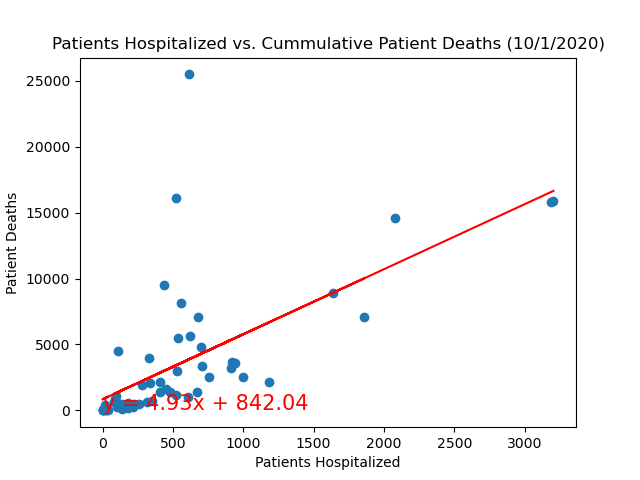

The r-squared is: 0.4230018033353281


In [55]:
#Scatterplot for Hospitalizations vs Deaths

x_values = october01_data['Currently Hospitalized']
y_values = october01_data['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients Hospitalized')
plt.ylabel('Patient Deaths')
plt.title('Patients Hospitalized vs. Cummulative Patient Deaths (10/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/october01_hops_vs_totaldeaths.png')
plt.show()

December Data

In [57]:
#Readjust the dataset for December

december01_data = covid_data_df.loc[covid_data_df['Date'] == 20201201].sort_values('Positive', ascending=False)
december01_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
285,20201201,CA,1225189.0,9049.0,0.0,2000.0,19211.0,70
327,20201201,TX,1184250.0,9047.0,0.0,2583.0,21549.0,170
290,20201201,FL,991910.0,4282.0,0.0,0.0,18916.0,82
296,20201201,IL,738846.0,5835.0,721.0,1195.0,13131.0,146
317,20201201,NY,655265.0,3774.0,348.0,718.0,26816.0,69


<IPython.core.display.Javascript object>


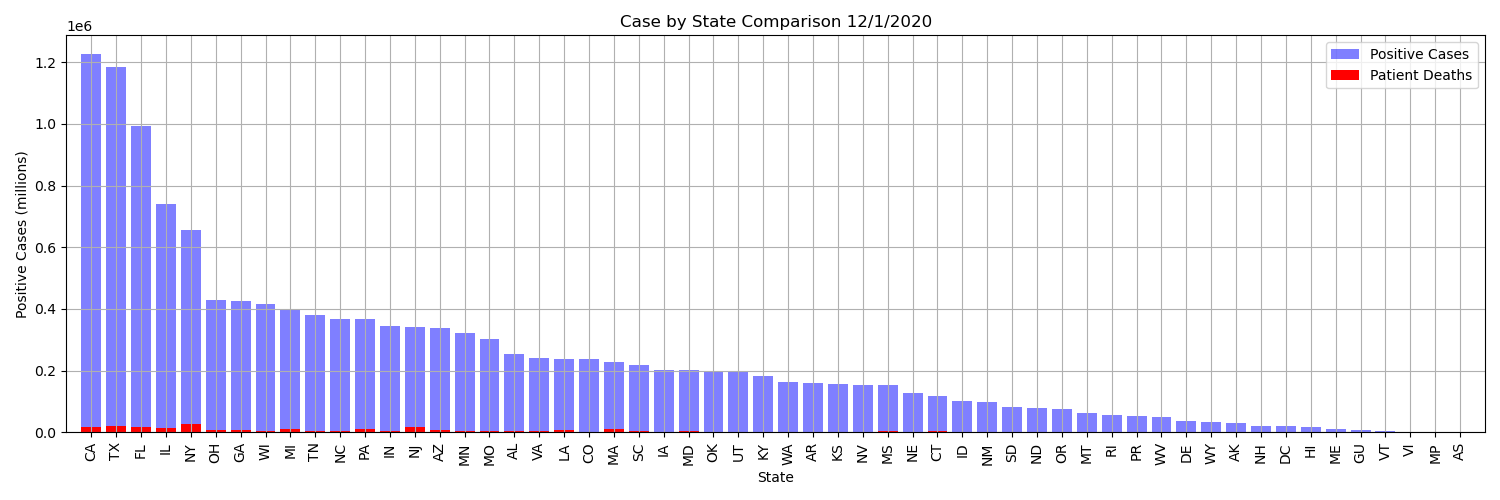

In [58]:
#Plot the bargraphs for December

x_axis = np.arange(len(december01_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, december01_data['Positive'], color='blue', alpha=0.5, align='center', label='Positive Cases')
plt.bar(x_axis, december01_data['Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, december01_data['State'], rotation='vertical')
plt.title('Case by State Comparison 12/1/2020')
plt.xlabel('State')
plt.ylabel('Positive Cases (millions)')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save the image

plt.tight_layout()
plt.savefig('Images/december01_state_cases.png')
plt.show()

In [59]:
#Readjust to show Deaths

december01_death_data = covid_data_df.loc[covid_data_df['Date'] == 20201201].sort_values('Deaths', ascending=False)
december01_death_data.head()

,Date,State,Positive,Currently Hospitalized,Currently On Ventilator,Currently In ICU,Deaths,Daily Deaths
317,20201201,NY,655265.0,3774.0,348.0,718.0,26816.0,69
327,20201201,TX,1184250.0,9047.0,0.0,2583.0,21549.0,170
285,20201201,CA,1225189.0,9049.0,0.0,2000.0,19211.0,70
290,20201201,FL,991910.0,4282.0,0.0,0.0,18916.0,82
314,20201201,NJ,341910.0,3129.0,359.0,601.0,17083.0,90


<IPython.core.display.Javascript object>


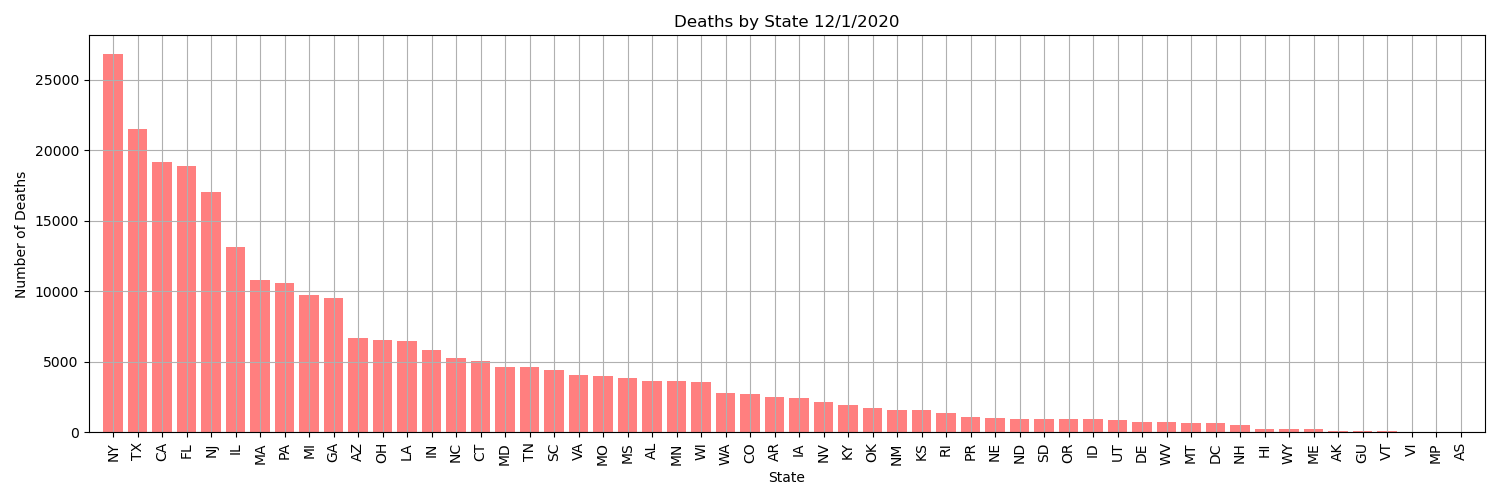

In [60]:
#Plot the bar graph

x_axis = np.arange(len(december01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, december01_death_data['Deaths'], color='red', alpha=0.5, align='center')
plt.xticks(x_axis, december01_death_data['State'], rotation='vertical')
plt.title('Deaths by State 12/1/2020')
plt.xlabel('State')
plt.ylabel('Number of Deaths')
plt.xlim(-1,len(x_axis))
plt.grid()

#Save the image

plt.tight_layout()
plt.savefig('Images/december01_state_deaths.png')
plt.show()

<IPython.core.display.Javascript object>


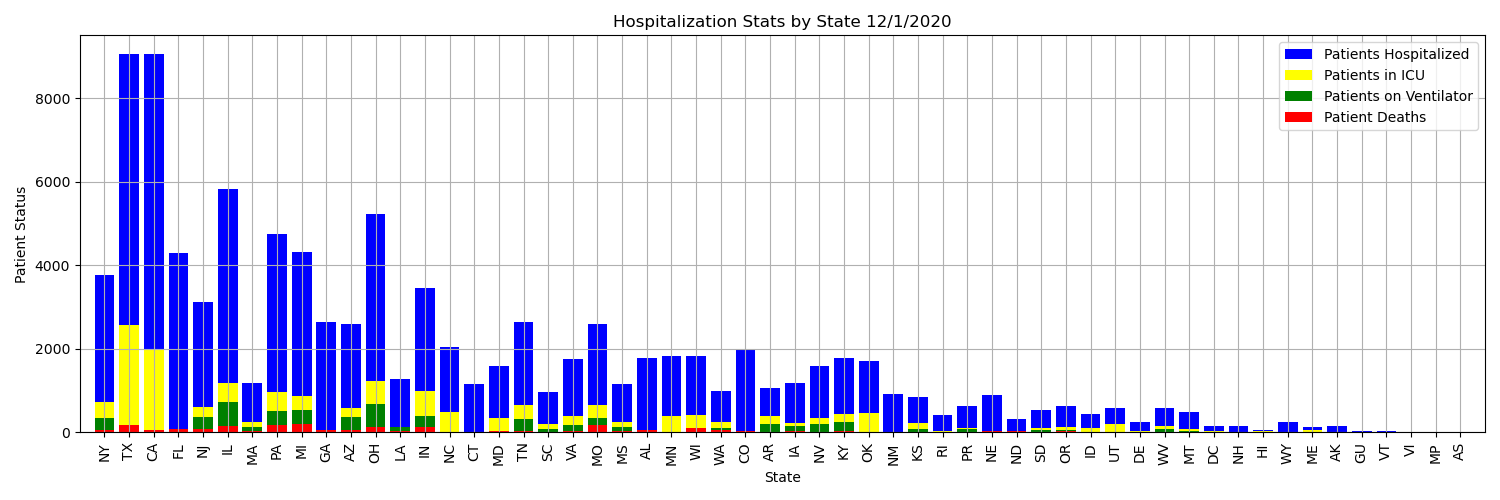

In [61]:
#Plot the bar graph

x_axis = np.arange(len(december01_death_data))

plt.figure(figsize=(15,5))
plt.bar(x_axis, december01_death_data['Currently Hospitalized'], color='blue', alpha=1, align='center', label='Patients Hospitalized')
plt.bar(x_axis, december01_death_data['Currently In ICU'], color='yellow', alpha=1, align='center', label='Patients in ICU')
plt.bar(x_axis, december01_death_data['Currently On Ventilator'], color='green', alpha=1, align='center', label='Patients on Ventilator')
plt.bar(x_axis, december01_death_data['Daily Deaths'], color='red', alpha=1, align='center', label='Patient Deaths')
plt.xticks(x_axis, december01_death_data['State'], rotation='vertical')
plt.title('Hospitalization Stats by State 12/1/2020')
plt.xlabel('State')
plt.ylabel('Patient Status')
plt.xlim(-1,len(x_axis))
plt.grid()
plt.legend(loc='best')

#Save the image

plt.tight_layout()
plt.savefig('Images/december01_status_comparison.png')
plt.show()

<IPython.core.display.Javascript object>


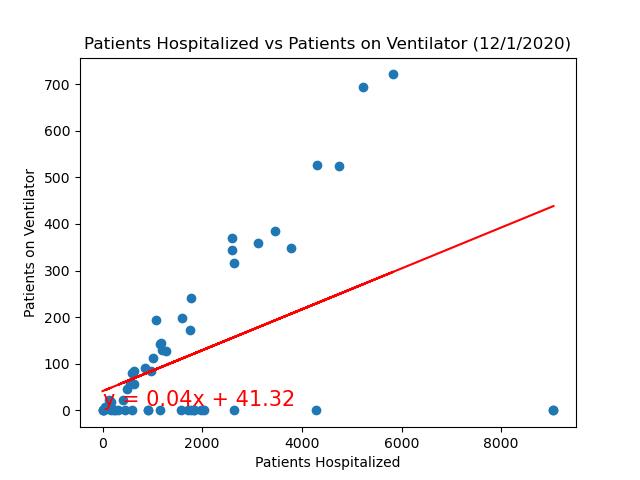

The r-squared is: 0.2356062438550595


In [62]:
#Scatterplot for Hospitalizations and Ventilators

x_values = december01_data['Currently Hospitalized']
y_values = december01_data['Currently On Ventilator']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients Hospitalized')
plt.ylabel('Patients on Ventilator')
plt.title('Patients Hospitalized vs Patients on Ventilator (12/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/december01_hosp_vs_vent.png')
plt.show()

<IPython.core.display.Javascript object>


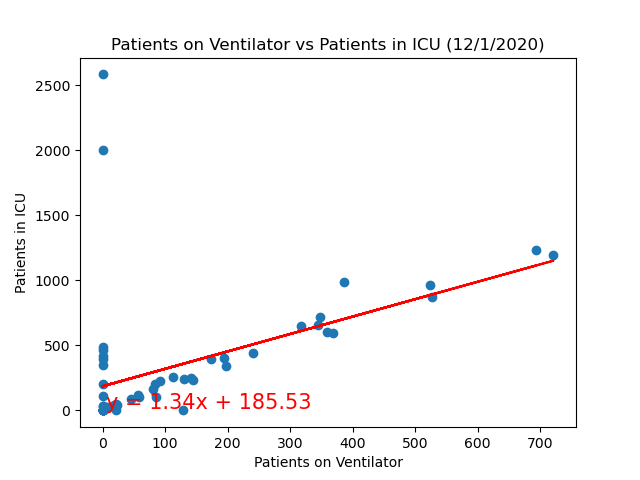

The r-squared is: 0.23618764308572016


In [63]:
#Scatterplot for Ventilators vs ICU

x_values = december01_data['Currently On Ventilator']
y_values = december01_data['Currently In ICU']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patients in ICU')
plt.title('Patients on Ventilator vs Patients in ICU (12/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/december01_vent_vs_icu.png')
plt.show()

<IPython.core.display.Javascript object>


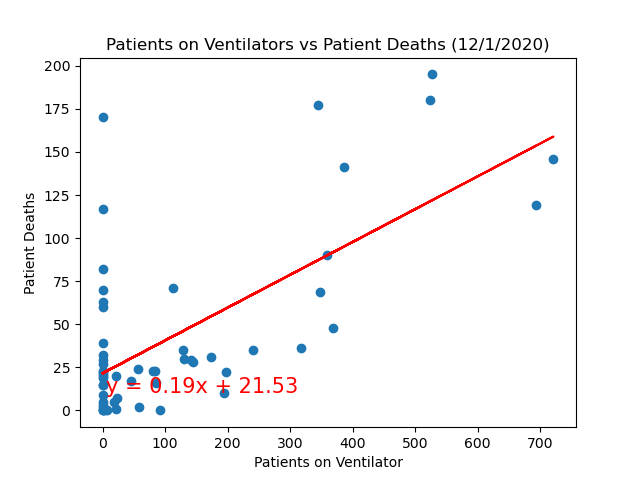

The r-squared is: 0.4458280974639456


In [64]:
#Scatterplot Ventilator vs Deaths

x_values = december01_data['Currently On Ventilator']
y_values = december01_data['Daily Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patient Deaths')
plt.title('Patients on Ventilators vs Patient Deaths (12/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/december01_vent_vs_deaths.png')
plt.show()

<IPython.core.display.Javascript object>


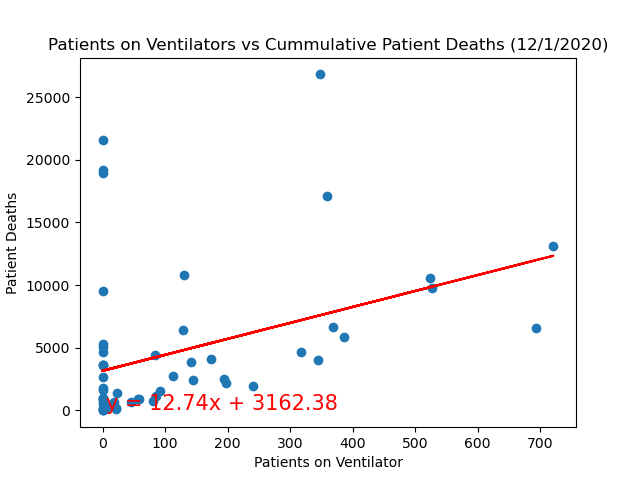

The r-squared is: 0.1477324085003909


In [65]:
#Scatterplot Ventilator vs Deaths

x_values = december01_data['Currently On Ventilator']
y_values = december01_data['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients on Ventilator')
plt.ylabel('Patient Deaths')
plt.title('Patients on Ventilators vs Cummulative Patient Deaths (12/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/december01_vent_vs_totaldeaths.png')
plt.show()

<IPython.core.display.Javascript object>


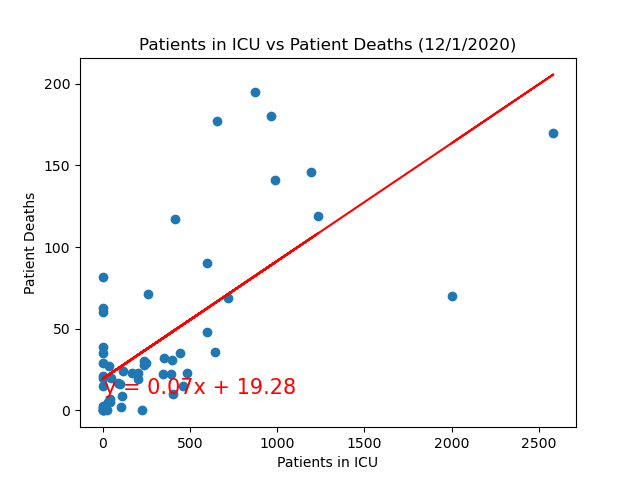

The r-squared is: 0.48604125861514175


In [67]:
#Scatterplots of ICU vs Deaths

x_values = december01_data['Currently In ICU']
y_values = december01_data['Daily Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients in ICU')
plt.ylabel('Patient Deaths')
plt.title('Patients in ICU vs Patient Deaths (12/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/december01_icu_vs_deaths.png')
plt.show()

<IPython.core.display.Javascript object>


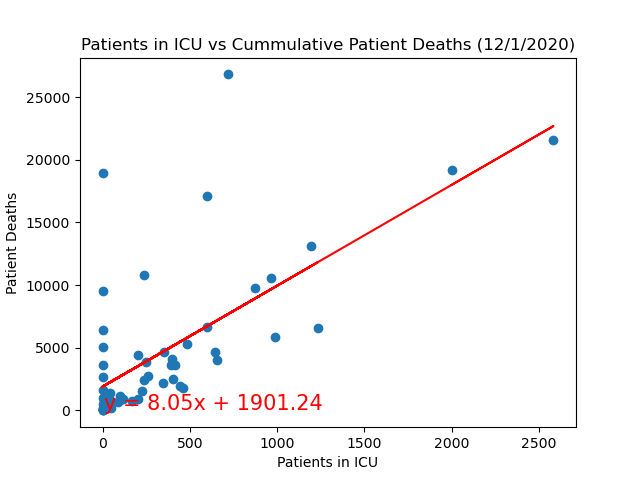

The r-squared is: 0.4480964729982496


In [68]:
#Scatterplots of ICU vs Deaths

x_values = december01_data['Currently In ICU']
y_values = december01_data['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Patients in ICU')
plt.ylabel('Patient Deaths')
plt.title('Patients in ICU vs Cummulative Patient Deaths (12/1/2020)')
print(f"The r-squared is: {rvalue**2}")

#Save the image

plt.savefig('Images/december01_icu_vs_totaldeaths.png')
plt.show()